In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [4]:
print(df.describe())

         Postal Code     Model Year  Electric Range      Base MSRP  \
count  177861.000000  177866.000000   177866.000000  177866.000000   
mean    98172.453506    2020.515512       58.842162    1073.109363   
std      2442.450668       2.989384       91.981298    8358.624956   
min      1545.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2019.000000        0.000000       0.000000   
50%     98122.000000    2022.000000        0.000000       0.000000   
75%     98370.000000    2023.000000       75.000000       0.000000   
max     99577.000000    2024.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         177477.000000    1.778660e+05       1.778610e+05  
mean              29.127481    2.202313e+08       5.297672e+10  
std               14.892169    7.584987e+07       1.578047e+09  
min                1.000000    4.385000e+03       1.001020e+09  
25%               18.000000    1.814743e+08 

In [5]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [6]:
#Handling missing values
df['County'].fillna('Unknown', inplace=True)
df['City'].fillna('Unknown', inplace=True)
df['Postal Code'].fillna(0, inplace=True) 
df['Legislative District'].fillna(0, inplace=True) 
df['Vehicle Location'].fillna('Unknown', inplace=True)
df['Electric Utility'].fillna('Unknown', inplace=True)
df['2020 Census Tract'].fillna(0, inplace=True)

C:\Users\anisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


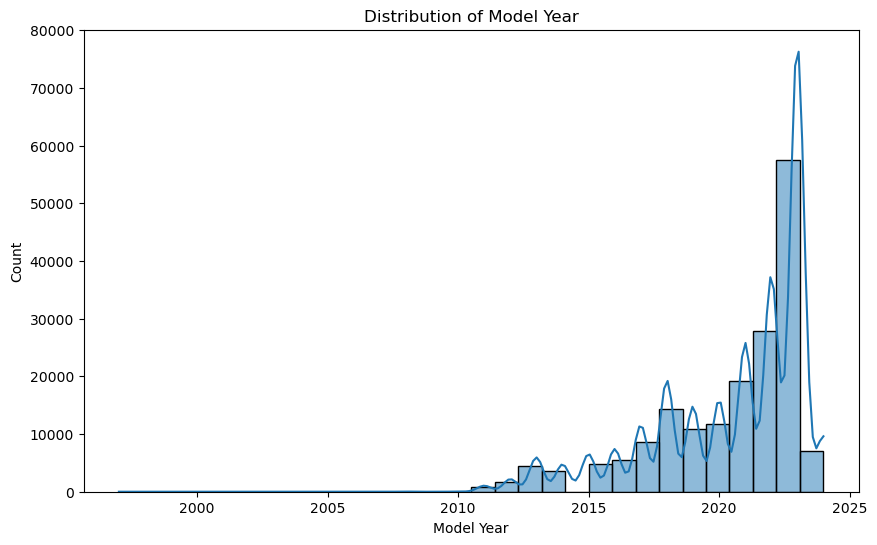

Count of each Model Year:
Model Year
2023    57587
2022    27776
2021    19132
2018    14323
2020    11768
2019    10940
2017     8562
2024     7080
2016     5483
2015     4844
2013     4409
2014     3509
2012     1618
2011      775
2010       23
2008       20
2000        7
1999        5
2002        2
1998        1
1997        1
2003        1
Name: count, dtype: int64


In [7]:
# Distribution of Model Year
plt.figure(figsize=(10, 6))
sns.histplot(df['Model Year'], bins=30, kde=True)
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.show()

print("Count of each Model Year:")
print(df['Model Year'].value_counts())

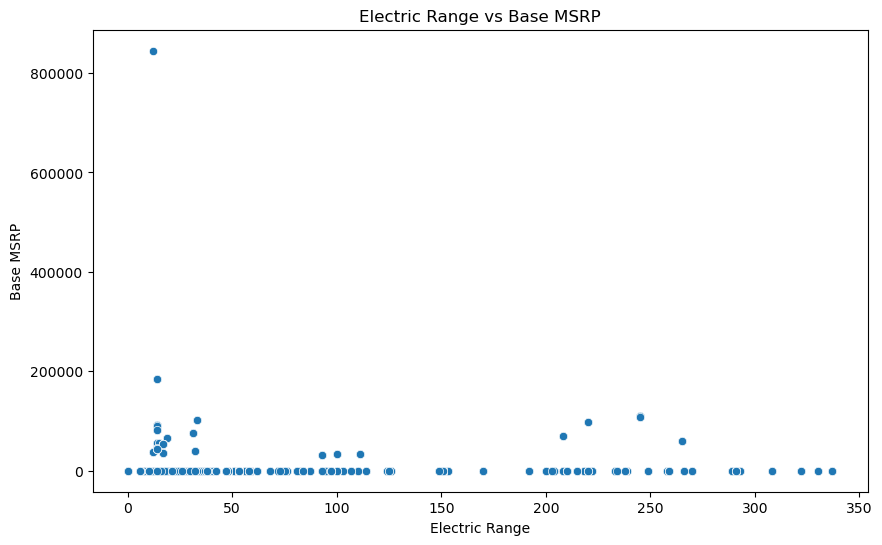

In [8]:
# Relationship between Electric Range and Base MSRP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Electric Range', y='Base MSRP', data=df)
plt.title('Electric Range vs Base MSRP')
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.show()

The scatter plot illustrates the positive relationship between electric range and base MSRP for electric vehicles, indicating that higher electric ranges tend to correspond to higher base MSRPs. However, considerable variability exists in pricing for vehicles with similar ranges, suggesting other factors influence pricing decisions. Outliers in the data may represent premium or budget models. Overall, the visualization provides insights into pricing dynamics and range preferences in the electric vehicle market.

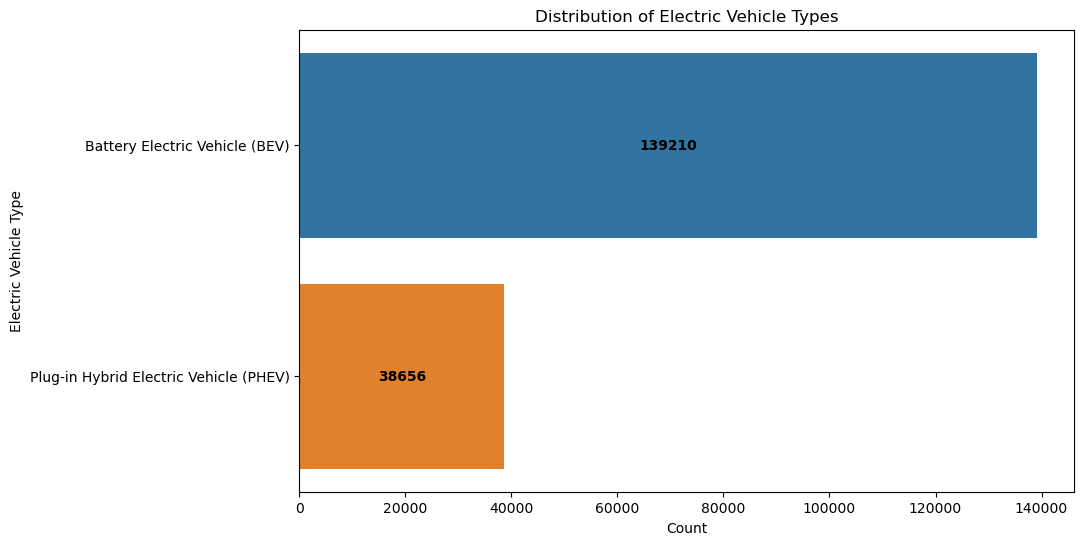

In [9]:
# Distribution of Electric Vehicle Types
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='Electric Vehicle Type', data=df, order=df['Electric Vehicle Type'].value_counts().index)
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Count')
plt.ylabel('Electric Vehicle Type')

for i, count in enumerate(df['Electric Vehicle Type'].value_counts()):
    ax.text(count / 2, i, str(count), ha='center', va='center', fontsize=10, color='black', weight='bold')

plt.show()

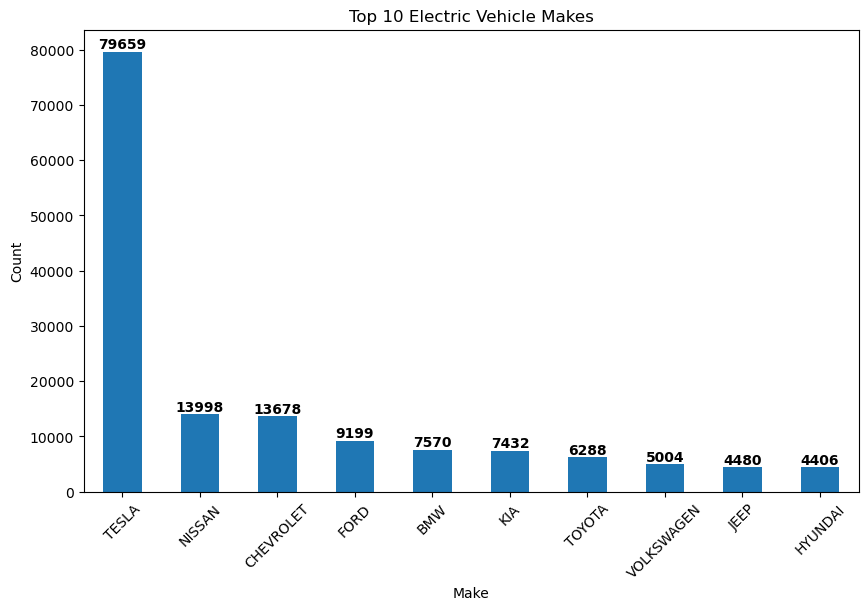

In [10]:
# Top 10 Electric Vehicle Makes
top_10_makes = df['Make'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_10_makes.plot(kind='bar')
plt.title('Top 10 Electric Vehicle Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, count in enumerate(top_10_makes):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.show()

C:\Users\anisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


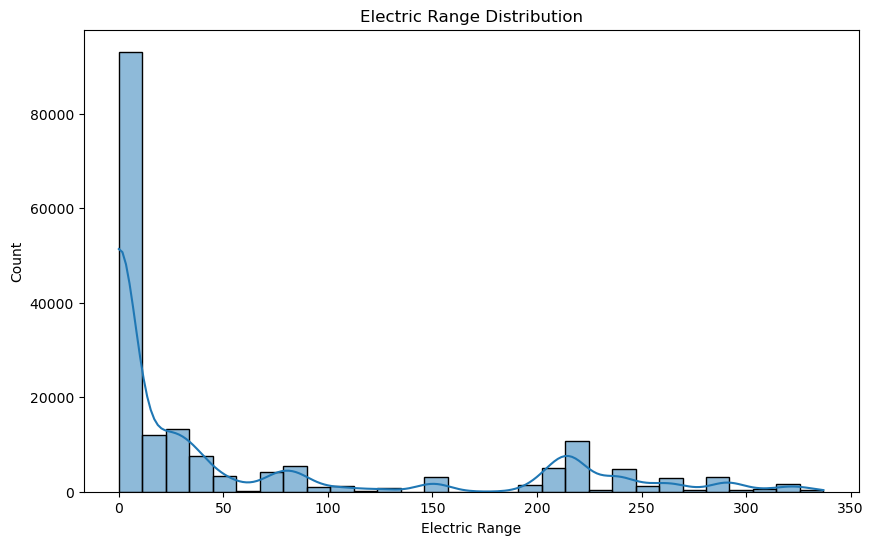

In [11]:
# Electric Range Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=30, kde=True)
plt.title('Electric Range Distribution')
plt.xlabel('Electric Range')
plt.ylabel('Count')
plt.show()

C:\Users\anisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


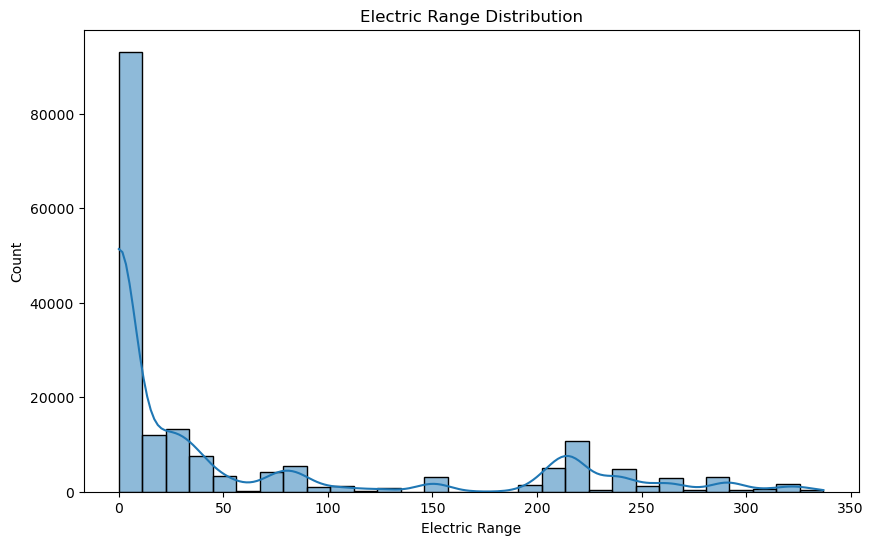

In [12]:
# Electric Range Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=30, kde=True)
plt.title('Electric Range Distribution')
plt.xlabel('Electric Range')
plt.ylabel('Count')
plt.show()

In [13]:
# Correlations between numeric variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: '5YJYGDEE1L'

<Figure size 1200x800 with 0 Axes>

The heatmap shows correlations between numeric variables. We can observe a moderate positive correlation between "Model Year" and "Base MSRP", indicating that newer models tend to have higher base prices.
There's also a weak positive correlation between "Electric Range" and "Base MSRP", suggesting that vehicles with higher electric range tend to have higher base prices.

In [ ]:
# Compare electric range and base MSRP across different electric vehicle types
plt.figure(figsize=(12, 8))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df)
plt.title('Electric Range by Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Electric Vehicle Type', y='Base MSRP', data=df)
plt.title('Base MSRP by Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Base MSRP')
plt.xticks(rotation=45)
plt.show()

Electric vehicles categorized as "Battery Electric Vehicle (BEV)" generally have higher electric ranges compared to "Plug-in Hybrid Electric Vehicle (PHEV)".
However, "PHEV" vehicles tend to have a wider range of base MSRPs compared to "BEV" vehicles, indicating greater variability in pricing for plug-in hybrids.

In [ ]:
# Pairplot to visualize pairwise relationships between numeric variables
sns.pairplot(df[['Electric Range', 'Base MSRP', 'Model Year']])
plt.show()

The pairplot visualizes pairwise relationships between numeric variables. We can observe that "Electric Range" and "Base MSRP" have some positive correlation with "Model Year", indicating that newer models tend to have higher electric ranges and base prices.
There seems to be a slight positive correlation between "Electric Range" and "Base MSRP", indicating that vehicles with higher electric ranges tend to have higher base prices.

In [ ]:
# Geographic visualization of electric vehicle distribution using latitude and longitude coordinates
df['Latitude'] = df['Vehicle Location'].str.extract(r'POINT \((\-?\d+\.\d+)\s(\-?\d+\.\d+)\)').astype(float).iloc[:, 1]
df['Longitude'] = df['Vehicle Location'].str.extract(r'POINT \((\-?\d+\.\d+)\s(\-?\d+\.\d+)\)').astype(float).iloc[:, 0]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='Electric Vehicle Type', palette='viridis')
plt.title('Geographic Distribution of Electric Vehicles')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The geographic distribution plot shows the distribution of electric vehicles across different locations based on latitude and longitude coordinates.
We can observe clusters of electric vehicles in certain regions, indicating higher adoption rates in those areas.
However, we can also see a relatively uniform spread of electric vehicles across various locations.

In [ ]:
# Compare the distribution of electric range and base MSRP across different electric vehicle types
plt.figure(figsize=(12, 8))
sns.violinplot(x='Electric Vehicle Type', y='Electric Range', data=df)
plt.title('Distribution of Electric Range by Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(x='Electric Vehicle Type', y='Base MSRP', data=df)
plt.title('Distribution of Base MSRP by Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Base MSRP')
plt.xticks(rotation=45)
plt.show()

The violin plots provide a detailed view of the distribution of electric range and base MSRP across different electric vehicle types.
We can observe the distribution and variability in electric range and base MSRP for each electric vehicle type.

In [ ]:
# Relationship between electric range and base MSRP with a regression line
plt.figure(figsize=(10, 8))
joint = sns.jointplot(x='Electric Range', y='Base MSRP', data=df, kind='reg', scatter_kws={'alpha': 0.3})
joint.fig.suptitle('Relationship between Electric Range and Base MSRP', y=1.02)
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.show()

The jointplot with a regression line shows the relationship between electric range and base MSRP.
We can observe a positive correlation between electric range and base MSRP, as indicated by the upward trend in the regression line.

In [ ]:
# Distribution of electric range and base MSRP with respect to the model year
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Electric Range', hue='Model Year', kde=True, bins=30)
plt.title('Distribution of Electric Range by Model Year')
plt.xlabel('Electric Range')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Base MSRP', hue='Model Year', kde=True, bins=30)
plt.title('Distribution of Base MSRP by Model Year')
plt.xlabel('Base MSRP')
plt.ylabel('Count')
plt.show()

The histograms with KDE visualize the distribution of electric range and base MSRP with respect to the model year.
We can observe changes in the distribution of electric range and base MSRP over different model years, providing insights into how these variables have evolved over time.

In [1]:
import pandas as pd
import plotly.express as px
import dash
from dash import html, dcc
from dash.dependencies import Input, Output

# Example DataFrame creation
data = {
    'Make': ['Tesla', 'Nissan', 'Chevrolet'],
    'Electric Vehicle Type': ['Sedan', 'SUV', 'Hatchback'],
    'Electric Range': [322, 239, 259],
    'Base MSRP': [49990, 38400, 36620],
    'Legislative District': ['District A', 'District B', 'District C']
}
df = pd.DataFrame(data)

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Electric Vehicle Dashboard", style={'text-align': 'center'}),
    
    dcc.Dropdown(
        id='dropdown-make',
        options=[{'label': make, 'value': make} for make in df['Make'].unique()],
        value=df['Make'].unique()[0], 
        clearable=False,
        style={'width': '50%', 'margin': 'auto'}
    ),
    
    html.Div([
        dcc.Graph(id='electric-vehicle-type', style={'width': '50%', 'display': 'inline-block'}),
        dcc.Graph(id='electric-range-vs-msrp', style={'width': '50%', 'display': 'inline-block'}),
    ], style={'display': 'flex'}),
    
    html.Div([
        dcc.Graph(id='electric-range-histogram', style={'width': '50%', 'display': 'inline-block'}),
        dcc.Graph(id='base-msrp-histogram', style={'width': '50%', 'display': 'inline-block'}),
    ], style={'display': 'flex'}),
    
    html.Div([
        dcc.Graph(id='base-msrp-boxplot', style={'width': '50%', 'display': 'inline-block'}),
        dcc.Graph(id='electric-range-vs-district', style={'width': '50%', 'display': 'inline-block'}),
    ], style={'display': 'flex'}),
])

@app.callback(
    Output('electric-vehicle-type', 'figure'),
    Output('electric-range-vs-msrp', 'figure'),
    Output('electric-range-histogram', 'figure'),
    Output('base-msrp-histogram', 'figure'),
    Output('base-msrp-boxplot', 'figure'),
    Output('electric-range-vs-district', 'figure'),
    Input('dropdown-make', 'value')
)
def update_graphs(selected_make):
    filtered_df = df[df['Make'] == selected_make]
    
    fig1 = px.pie(filtered_df, names='Electric Vehicle Type', title='Electric Vehicle Type Distribution')
    fig2 = px.scatter(filtered_df, x='Electric Range', y='Base MSRP', title='Electric Range vs Base MSRP', color='Electric Vehicle Type')
    fig3 = px.histogram(filtered_df, x='Electric Range', title='Electric Range Distribution')
    fig4 = px.histogram(filtered_df, x='Base MSRP', title='Base MSRP Distribution')
    fig5 = px.box(filtered_df, x='Electric Vehicle Type', y='Base MSRP', title='Base MSRP Distribution by Electric Vehicle Type')
    fig6 = px.scatter(filtered_df, x='Electric Range', y='Legislative District', title='Electric Range vs Legislative District', color='Electric Vehicle Type')
    
    return fig1, fig2, fig3, fig4, fig5, fig6

if __name__ == '__main__':
    app.run_server(debug=True)


Electric Vehicle Type Distribution (Pie Chart):
This visualization shows the distribution of electric vehicle types (e.g., Battery Electric Vehicle, Plug-in Hybrid Electric Vehicle) for the selected electric vehicle make.
Each segment of the pie chart represents a different electric vehicle type, with the size of the segment indicating its proportion within the selected make.

Electric Range vs Base MSRP (Scatter Plot):
This scatter plot visualizes the relationship between electric range (in miles) and base Manufacturer's Suggested Retail Price (MSRP) for the selected electric vehicle make.
Each point represents an electric vehicle, and its position on the plot indicates its electric range and base MSRP.
Points are color-coded by electric vehicle type, allowing for easy differentiation between different types of electric vehicles.

Electric Range Distribution (Histogram):
This histogram displays the distribution of electric ranges among electric vehicles for the selected make.
The x-axis represents the electric range (in miles), and the y-axis represents the frequency or count of electric vehicles falling within each range.
It provides insights into the spread and concentration of electric range values within the selected make.

Base MSRP Distribution (Histogram):
This histogram illustrates the distribution of base MSRPs among electric vehicles for the selected make.
The x-axis represents the base MSRP, and the y-axis represents the frequency or count of electric vehicles falling within each price range.
It helps in understanding the pricing distribution and range of electric vehicles within the selected make.

Base MSRP Distribution by Electric Vehicle Type (Box Plot):
This box plot compares the distribution of base MSRPs across different electric vehicle types within the selected make.
Each box represents a different electric vehicle type, with the box's height indicating the interquartile range (IQR) of base MSRPs for that type.
It provides insights into the variation in pricing across different types of electric vehicles within the selected make.

Electric Range vs Legislative District (Scatter Plot):
This scatter plot visualizes the relationship between electric range (in miles) and legislative districts for the selected electric vehicle make.
Each point represents an electric vehicle, and its position on the plot indicates its electric range and legislative district.
Points are color-coded by electric vehicle type, allowing for easy differentiation between different types of electric vehicles.
It provides insights into the distribution of electric vehicles' electric ranges across different legislative districts within the selected make.